<a href="https://colab.research.google.com/github/Zelofane22/IA-aprentissage/blob/main/IA_Projet_de_classification_de_pistolets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Étape 1 : Mise en place de la base

In [ ]:
# @title Code utilisé pour télécharger les images sur bing corrompus du dataset
# import os
# from bing_image_downloader import downloader
# from tqdm import tqdm  # Bibliothèque pour afficher une barre de chargement

# # Dossier de base pour enregistrer les images
# base_directory = "pistolet_images"

# # Liste des classes de pistolets
# classes = [
#     "Glock 17",
#     "Beretta 92",
#     "Smith & Wesson 686",
#     "Colt M1911",
#     "Ruger LCP",
#     "Walther P22",
#     "Derringer",
#     "Sig Sauer P365"
# ]

# # Nombre d'images par classe
# num_images = 1000

# # Télécharger les images pour chaque classe
# for category in tqdm(classes, desc="Catégories", unit="classe"):
#     print(f"\nTéléchargement des images pour : {category}")
#     downloader.download(
#         query=category,  # Mot-clé à rechercher
#         limit=num_images,  # Nombre d'images à télécharger
#         output_dir=base_directory,  # Dossier où enregistrer les images
#         adult_filter_off=True,  # Désactiver le filtre "adulte"
#         force_replace=False,  # Ne pas remplacer les fichiers existants
#         timeout=60  # Timeout pour chaque requête
#         verbose=False  # Désactiver les messages de progression
#     )

# print("\nTéléchargement terminé pour toutes les catégories !")


Puisque la quantité d'images n'était pas suffisante, nous avons utilisé flik et google accompagné de l'extension "Download All images" .

In [ ]:
# @title Code utilisé pour supprimer les fichiers corrompus du dataset
"""
from PIL import Image
import os


def clean_image_folders(root_folder):

    # Parcourt récursivement le dossier principal
    for root, _, files in os.walk(root_folder):
        for filename in files:
            file_path = os.path.join(root, filename)

            # Vérifie si le fichier est une image valide
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Vérifie l'intégrité du fichier image
            except Exception as e:
                # Supprime le fichier s'il génère une erreur
                os.remove(file_path)
                print(f"[SUPPRIMÉ] {file_path} : Erreur lors de l'identification ({e}).")

root_folder = "pistolet_images"  # Chemin vers le dossier principal
clean_image_folders(root_folder)
"""

'\nfrom PIL import Image\nimport os\n\n\ndef clean_image_folders(root_folder):\n\n    # Parcourt récursivement le dossier principal\n    for root, _, files in os.walk(root_folder):\n        for filename in files:\n            file_path = os.path.join(root, filename)\n\n            # Vérifie si le fichier est une image valide\n            try:\n                with Image.open(file_path) as img:\n                    img.verify()  # Vérifie l\'intégrité du fichier image\n            except Exception as e:\n                # Supprime le fichier s\'il génère une erreur\n                os.remove(file_path)\n                print(f"[SUPPRIMÉ] {file_path} : Erreur lors de l\'identification ({e}).")\n\nroot_folder = "pistolet_images"  # Chemin vers le dossier principal\nclean_image_folders(root_folder)\n'

In [ ]:
# @title Code utilisé pour supprimer les images de mauvais format du dataset
"""import tensorflow as tf
import os
from tqdm import tqdm


for subdir, _, files in os.walk("/content/ggDrive/MyDrive/AI & Jeu/pistolet_images"):
    i = 0
    for file in tqdm(files, desc=subdir):
        file_path = os.path.join(subdir, file)
        # Filtrer les fichiers invalides
        try:
            tf.io.decode_image(tf.io.read_file(file_path))
        except:
            os.remove(file_path)
            i += 1
    print(f">>> {i} images non valides dans {subdir}")"""

'import tensorflow as tf\nimport os\nfrom tqdm import tqdm\n\n\nfor subdir, _, files in os.walk("/content/ggDrive/MyDrive/AI & Jeu/pistolet_images"):\n    i = 0\n    for file in tqdm(files, desc=subdir):\n        file_path = os.path.join(subdir, file)\n        # Filtrer les fichiers invalides\n        try:\n            tf.io.decode_image(tf.io.read_file(file_path))\n        except:\n            os.remove(file_path)\n            i += 1\n    print(f">>> {i} images non valides dans {subdir}")'

### Structure du dataset
pistolet_images/

├── Glock 17/

│   ├── 1.jpg

│   ├── 2.jpg

│   ├── ...

├── Beretta 92/

│   ├── 1.jpg

│   ├── 2.jpg

│   ├── ...

...

## volumétrie
*   Taille : 1.35 Go
*   Nombre d'échantillons : 8368
*   Résolution : varié

## Les difficultés rencontrées
* La récupération automatisée des images ne fournit qu'une très faible quantité d'images. En moyenne 200 images par classe.
* Les images récupérées sur flickr et Google contiennent des faux positifs qu'il fallait supprimer manuellement.

# Étape 2 : Mise en place du DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/ggDrive', force_remount=True)

Mounted at /content/ggDrive


In [ ]:
# @title Data Loader
import keras
train, valid = keras.utils.image_dataset_from_directory(
                                                directory = '/content/ggDrive/MyDrive/AI & Jeu/pistolet_images',
                                                batch_size=64,
                                                image_size=(64, 64),
                                                validation_split=0.2,
                                                subset='both',
                                                seed = 14)

Found 8368 files belonging to 8 classes.
Using 6695 files for training.
Using 1673 files for validation.


In [ ]:
print(train.class_names)

['Beretta 92', 'Colt M1911', 'Derringer', 'Glock 17', 'Ruger LCP', 'Sig Sauer P365', 'Smith & Wesson 686', 'Walther P22']


In [ ]:
# @title Fonction pour afficher le contenu d'un batch
import matplotlib.pyplot as plt
import numpy as np
def ShowSamples(T):
  plt.figure(figsize=(10, 10))
  plt.subplots_adjust(top=1)
  for images, labels in T.take(1):
          for i in range(10):
                  ax = plt.subplot(7, 7, i + 1)
                  plt.imshow(np.array(images[i]).astype("uint8"))
                  plt.title(train.class_names[labels[i]])
                  plt.axis("off")


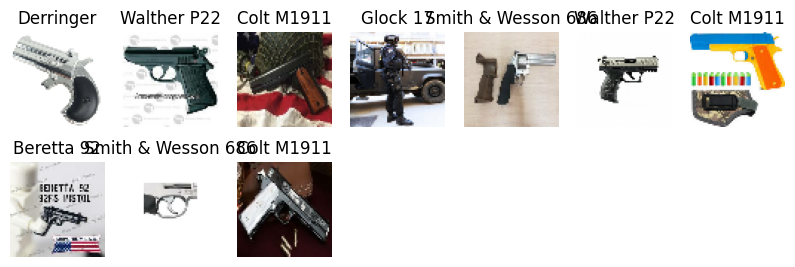

In [ ]:
# @title contenu du batch 1
ShowSamples(train)

In [ ]:
# @title Data Augmentation
data_augmentation_layers = [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))

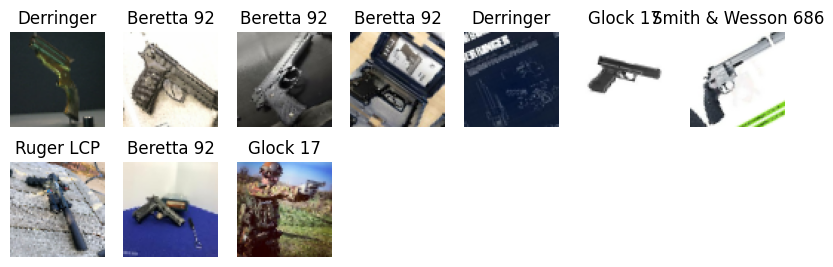

In [ ]:
# @title Affichage
ShowSamples(augmented_train)

# Étape 3 : réseau FC

In [ ]:
# @title réseau FC
import time

# Création du modèle
model = keras.Sequential()
model.add(keras.Input(shape=(64,64,3)))
model.add(keras.layers.Rescaling(1.0 / 255))     ## couche supplémentaire pour l'étalonnage
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))

model.summary()

model.compile(optimizer='adam',
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,574,024 (6.00 MB)

 Trainable params: 1,574,024 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Apprentissage
# Configuration des callbacks
folder = '/content/ggDrive/MyDrive/AI & Jeu/'
callbacks = [
    keras.callbacks.ModelCheckpoint(folder + 'network.keras', verbose=True),
    keras.callbacks.CSVLogger(folder + 'model_history_log.csv', append=True)
]

# Mesurer le temps d'entraînement
start_time = time.time()

# Entraînement du modèle
history = model.fit(x=augmented_train, epochs=10, callbacks=callbacks)

end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time:.2f} secondes")

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1388 - loss: 6.6786
Epoch 1: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 672s 6s/step - accuracy: 0.1390 - loss: 6.6514
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.1947 - loss: 2.0709
Epoch 2: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 90s 762ms/step - accuracy: 0.1948 - loss: 2.0708
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.1988 - loss: 2.0273
Epoch 3: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 78s 722ms/step - accuracy: 0.1989 - loss: 2.0274
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.2333 - loss: 1.9881
Epoch 4: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 78s 734ms/step - accuracy: 0.2332 - loss: 1.9882
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/

In [ ]:
# @title Visualisation des métriques
import matplotlib.pyplot as plt

# Précision
# plt.plot(history.history['precision'], label='Précision (train)')
plt.plot(history.history['val_precision'], label='Précision (validation)')
plt.legend()
plt.title('Évolution de la précision')
plt.show()

# Rappel
plt.plot(history.history['recall'], label='Rappel (train)')
plt.plot(history.history['val_recall'], label='Rappel (validation)')
plt.legend()
plt.title('Évolution du rappel')
plt.show()

# Précision
plt.plot(history.history['accuracy'], label='Précision (train)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.legend()
plt.title('Évolution de la précision globale')
plt.show()

NameError: name 'history' is not defined